In [5]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Загрузка данных
df = pd.read_csv('Wholesale_customers_data.csv')

# Просмотр первых строк
print("Первые 5 строк датасета:")
print(df.head())

print("\nИнформация о датасете:")
print(df.info())

print("\nСтатистика по данным:")
print(df.describe())

Первые 5 строк датасета:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergen

In [6]:
# Проверка на пропущенные значения
print("Пропущенные значения:")
print(df.isnull().sum())

# Просмотр уникальных значений в категориальных переменных
print("\nУникальные значения Channel:")
print(df['Channel'].unique())
print("\nУникальные значения Region:")
print(df['Region'].unique())

Пропущенные значения:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Уникальные значения Channel:
[2 1]

Уникальные значения Region:
[3 1 2]


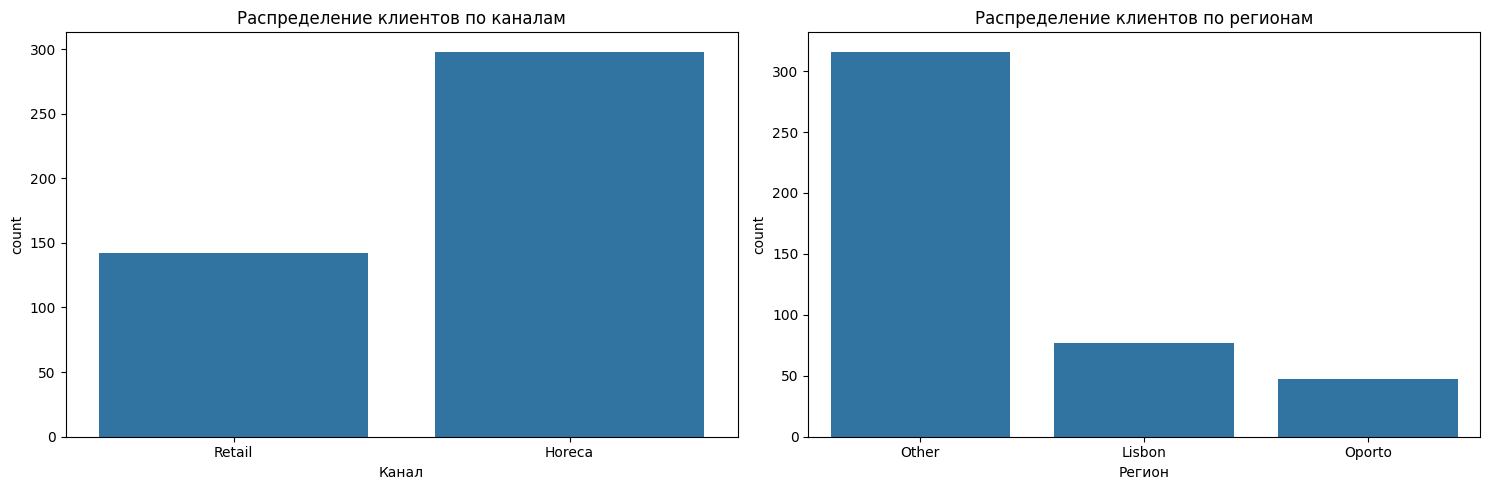

In [7]:

df_analysis = df.copy()

# Преобразование категориальных переменных в текстовые метки для визуализации
channel_map = {1: 'Horeca', 2: 'Retail'}
region_map = {1: 'Lisbon', 2: 'Oporto', 3: 'Other'}

df_analysis['Channel_Name'] = df_analysis['Channel'].map(channel_map)
df_analysis['Region_Name'] = df_analysis['Region'].map(region_map)

# Визуализация распределения по каналам и регионам
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Распределение по каналам
sns.countplot(data=df_analysis, x='Channel_Name', ax=axes[0])
axes[0].set_title('Распределение клиентов по каналам')
axes[0].set_xlabel('Канал')

# Распределение по регионам
sns.countplot(data=df_analysis, x='Region_Name', ax=axes[1])
axes[1].set_title('Распределение клиентов по регионам')
axes[1].set_xlabel('Регион')

plt.tight_layout()
plt.show()

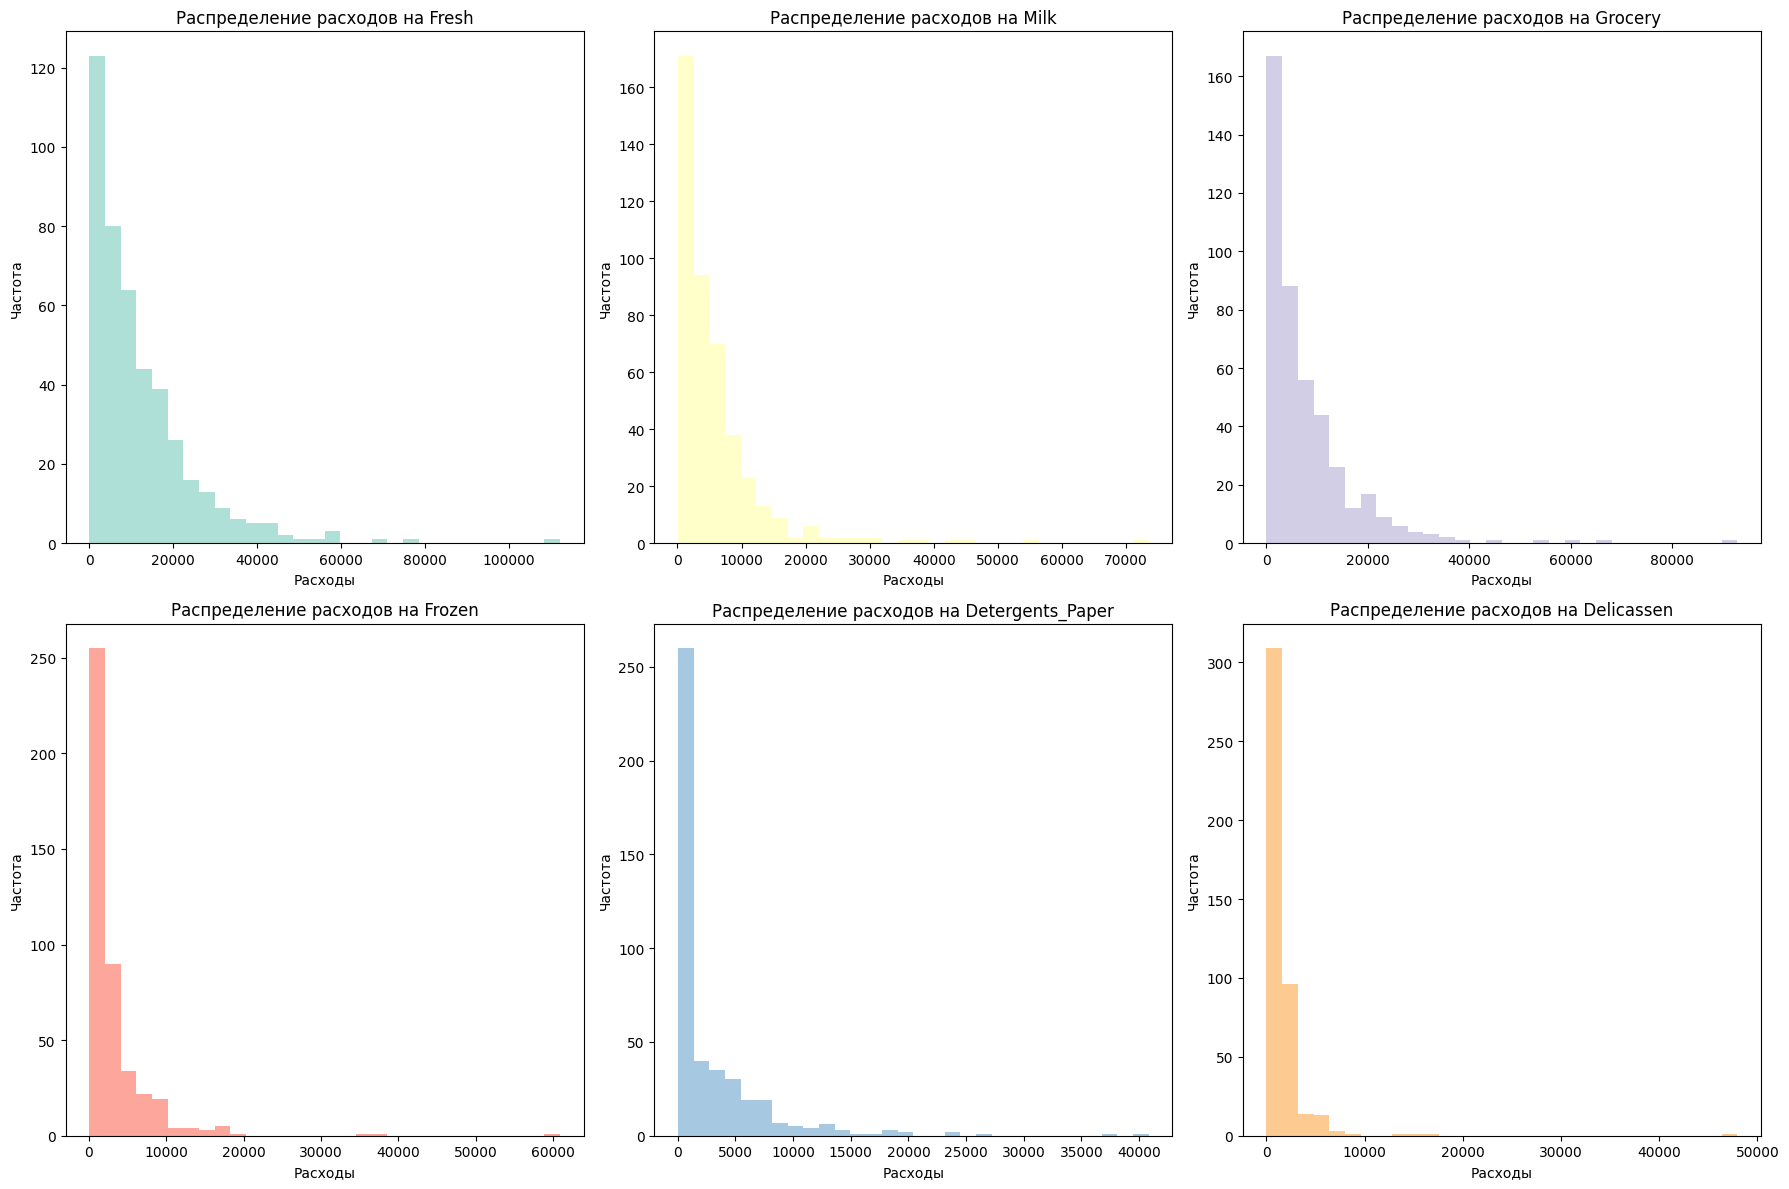

In [8]:
# Визуализация распределения расходов по категориям
spending_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(spending_columns):
    axes[i].hist(df[col], bins=30, alpha=0.7, color=plt.cm.Set3(i))
    axes[i].set_title(f'Распределение расходов на {col}')
    axes[i].set_xlabel('Расходы')
    axes[i].set_ylabel('Частота')

plt.tight_layout()
plt.show()

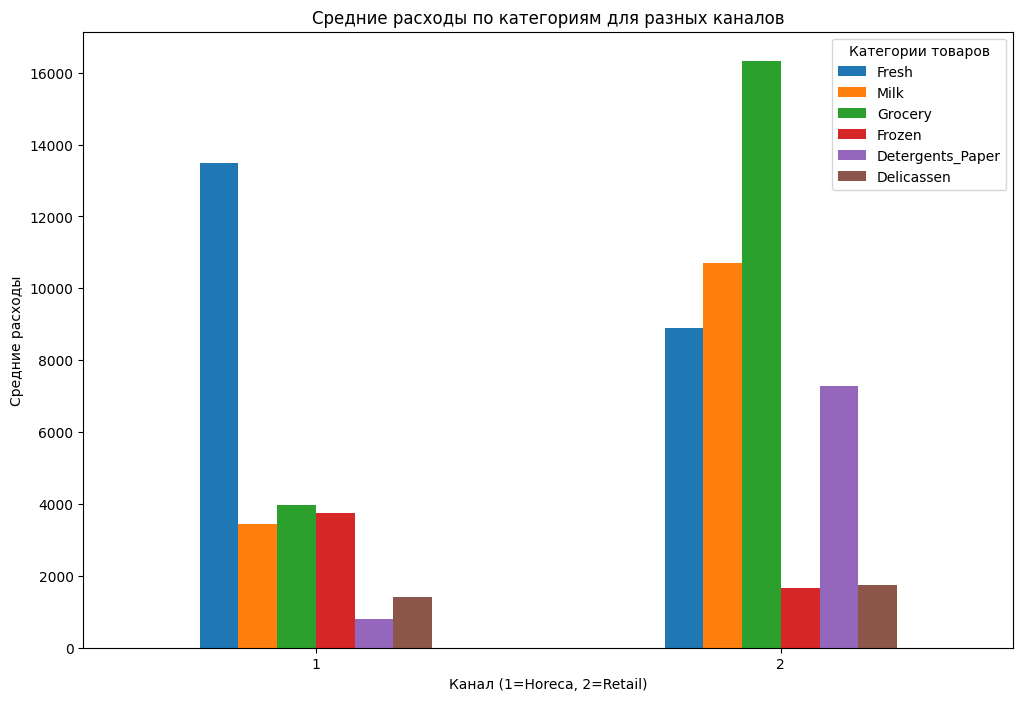

In [9]:
# Сравнение средних расходов по каналам
channel_spending = df.groupby('Channel')[spending_columns].mean()

fig, ax = plt.subplots(figsize=(12, 8))
channel_spending.plot(kind='bar', ax=ax)
ax.set_title('Средние расходы по категориям для разных каналов')
ax.set_xlabel('Канал (1=Horeca, 2=Retail)')
ax.set_ylabel('Средние расходы')
plt.xticks(rotation=0)
plt.legend(title='Категории товаров')
plt.show()

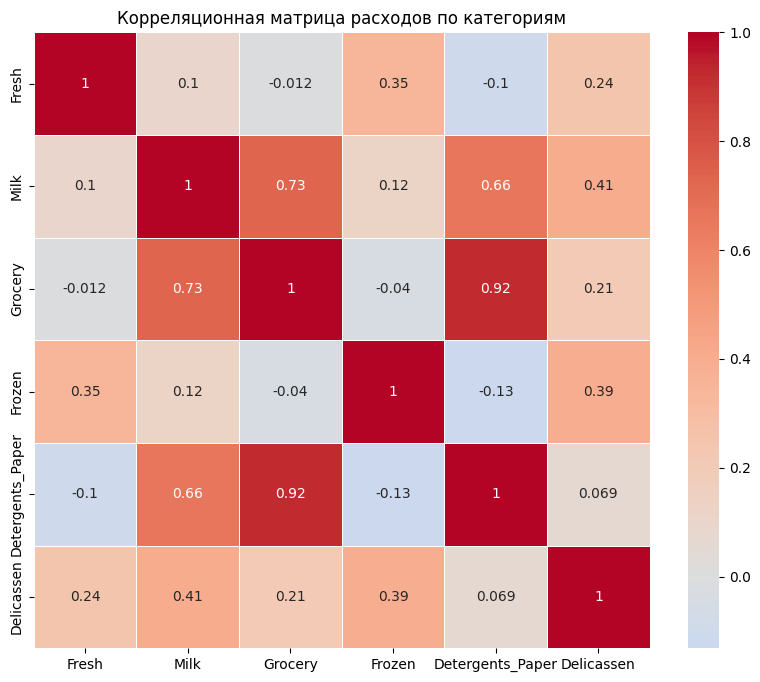

In [10]:
# Корреляционная матрица
plt.figure(figsize=(10, 8))
correlation_matrix = df[spending_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Корреляционная матрица расходов по категориям')
plt.show()

In [11]:
# Подготовка данных для кластеризации
# Используем только числовые переменные
X = df[spending_columns]

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Форма данных после стандартизации:", X_scaled.shape)

Форма данных после стандартизации: (440, 6)


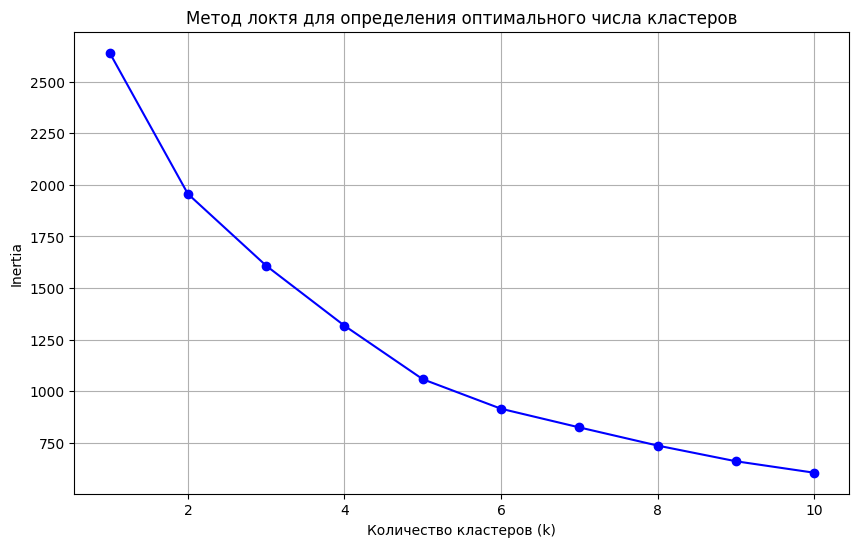

In [12]:
# метод локтя
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Построение графика метода локтя
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Inertia')
plt.title('Метод локтя для определения оптимального числа кластеров')
plt.grid(True)
plt.show()

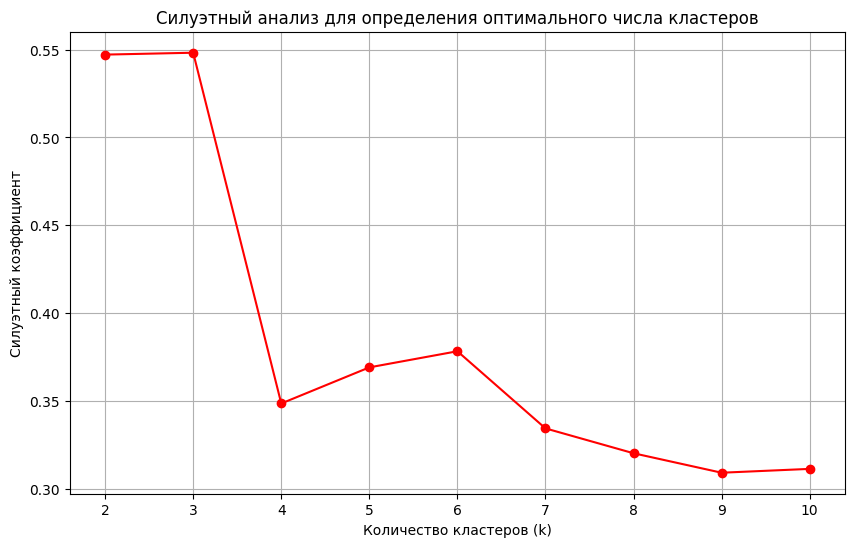

Силуэтные коэффициенты для разных k:
k=2: 0.547
k=3: 0.548
k=4: 0.348
k=5: 0.369
k=6: 0.378
k=7: 0.334
k=8: 0.320
k=9: 0.309
k=10: 0.311


In [13]:
# Определение оптимального числа кластеров по силуэтному коэффициенту
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Построение графика силуэтных коэффициентов
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, 'ro-')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Силуэтный коэффициент')
plt.title('Силуэтный анализ для определения оптимального числа кластеров')
plt.grid(True)
plt.show()

print("Силуэтные коэффициенты для разных k:")
for i, score in enumerate(silhouette_scores):
    print(f"k={i+2}: {score:.3f}")

In [25]:
# Проверим силуэтные коэффициенты для k=2
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(X_scaled)
silhouette_2 = silhouette_score(X_scaled, labels_2)

# Сравним с k=3
silhouette_3 = silhouette_score(X_scaled, cluster_labels)

print(f"Силуэтный коэффициент для k=2: {silhouette_2:.3f}")
print(f"Силуэтный коэффициент для k=3: {silhouette_3:.3f}")

# Если качество почти одинаковое, лучше выбрать k=2
if abs(silhouette_2 - silhouette_3) < 0.01:
    print("Рекомендуется k=2 из-за лучшей балансировки кластеров")
else:
    print("Проверьте наличие выбросов")

Силуэтный коэффициент для k=2: 0.547
Силуэтный коэффициент для k=3: 0.548
Рекомендуется k=2 из-за лучшей балансировки кластеров


In [28]:
# Кластеризация с оптимальным числом кластеров (предположим k=3)
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Добавление меток кластеров в исходные данные
df['Cluster'] = cluster_labels
df_analysis['Cluster'] = cluster_labels

print(f"Кластеризация выполнена с k={optimal_k}")
print("Размеры кластеров:")
print(df['Cluster'].value_counts().sort_index())

Кластеризация выполнена с k=2
Размеры кластеров:
Cluster
0    389
1     51
Name: count, dtype: int64


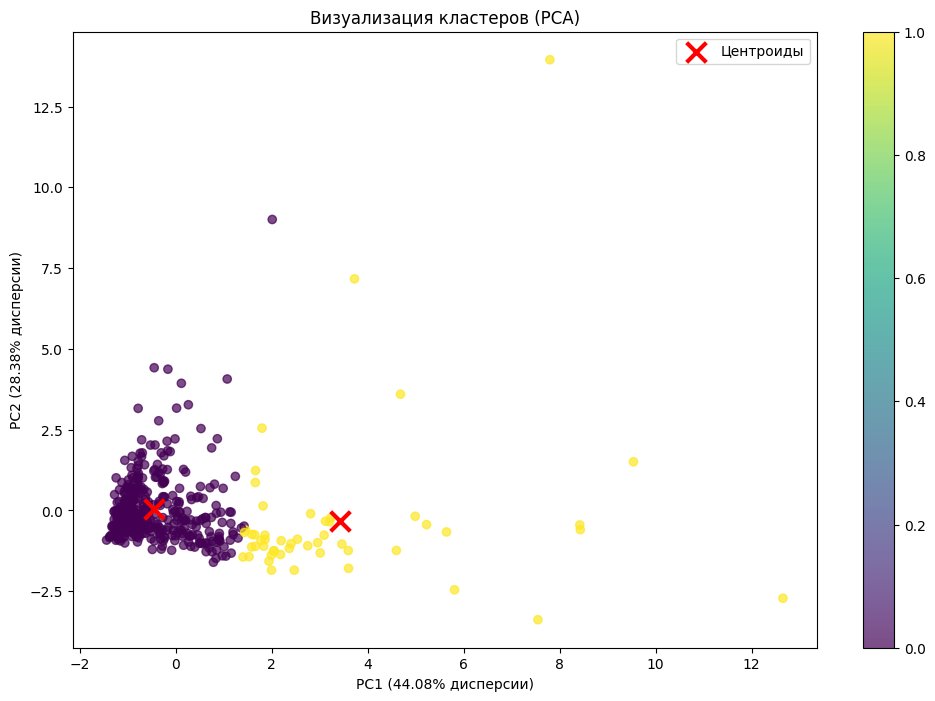

PCA объясняет 72.46% общей дисперсии


In [29]:
# Визуализация кластеров с помощью PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Создание графика кластеров
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} дисперсии)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} дисперсии)')
plt.title('Визуализация кластеров (PCA)')
plt.colorbar(scatter)

# Добавление центроидов
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='x', s=200, linewidths=3, label='Центроиды')
plt.legend()
plt.show()

print(f"PCA объясняет {sum(pca.explained_variance_ratio_):.2%} общей дисперсии")

Средние значения по кластерам:
                Fresh          Milk       Grocery       Frozen  \
Cluster                                                          
0        12157.300771   4028.169666   5402.722365  3066.066838   
1        10802.764706  19282.333333  27390.254902  3116.666667   

         Detergents_Paper   Delicassen  
Cluster                                 
0             1667.688946  1256.894602  
1            12139.725490  3568.843137  


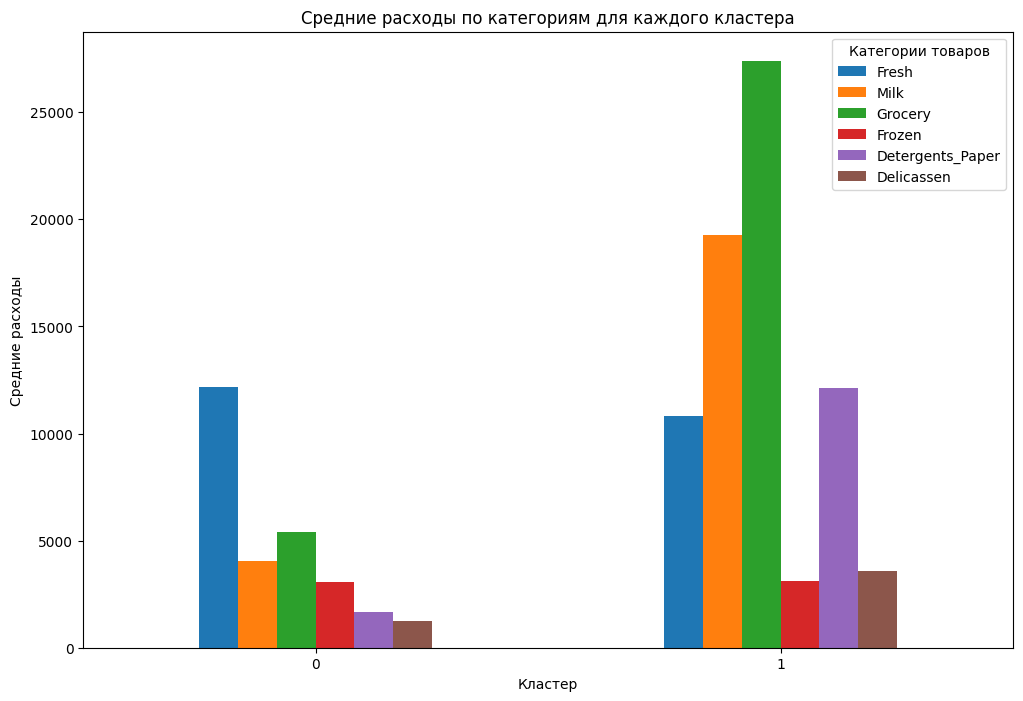

In [30]:
# Анализ характеристик кластеров
cluster_summary = df.groupby('Cluster')[spending_columns].mean()
print("Средние значения по кластерам:")
print(cluster_summary)

fig, ax = plt.subplots(figsize=(12, 8))
cluster_summary.plot(kind='bar', ax=ax)
ax.set_title('Средние расходы по категориям для каждого кластера')
ax.set_xlabel('Кластер')
ax.set_ylabel('Средние расходы')
plt.xticks(rotation=0)
plt.legend(title='Категории товаров')
plt.show()

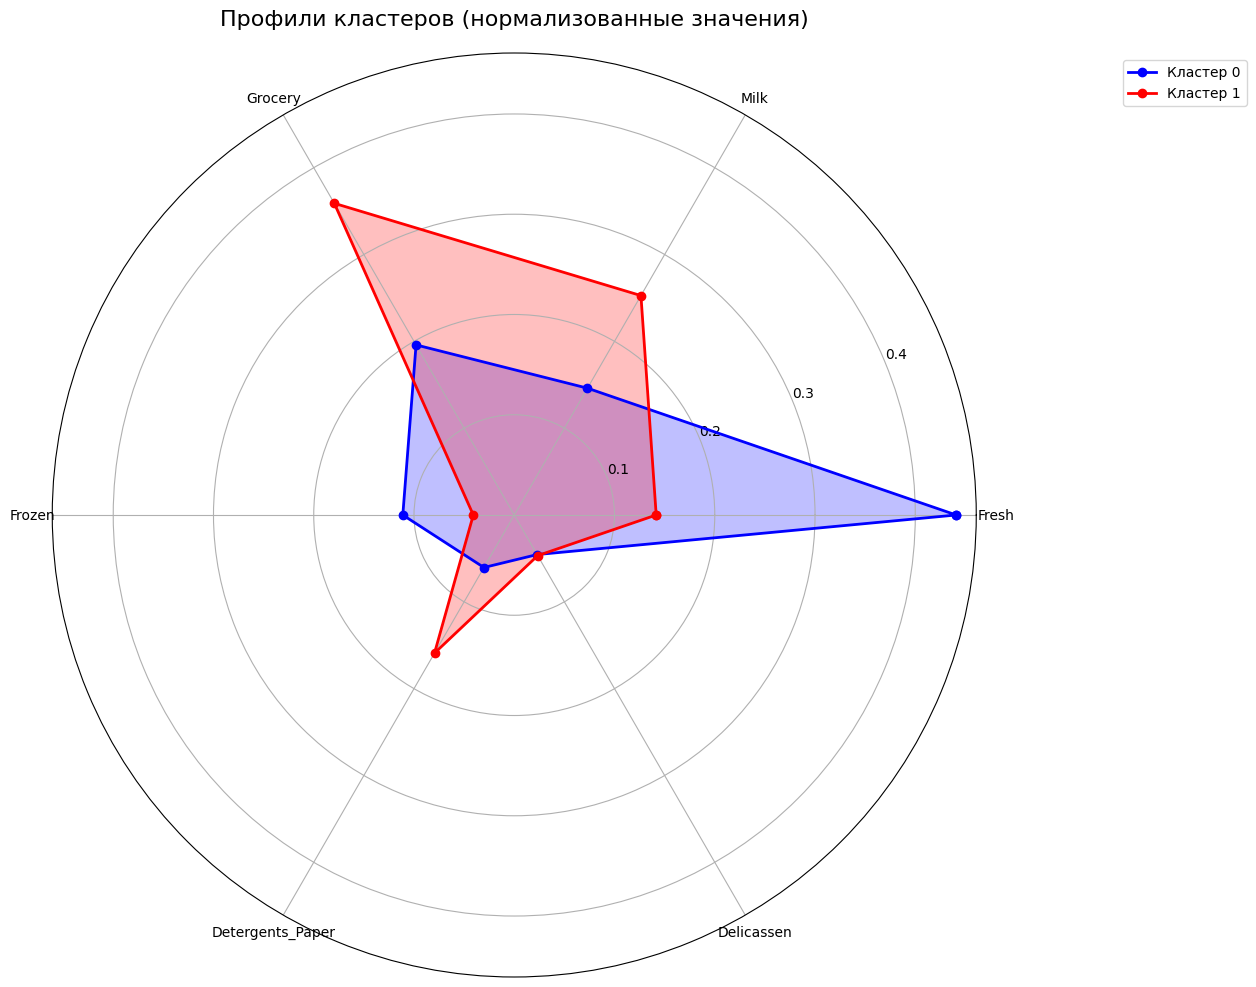

In [31]:
# Радарная диаграмма для сравнения кластеров
from math import pi

# Нормализация данных для радарной диаграммы
cluster_normalized = cluster_summary.div(cluster_summary.sum(axis=1), axis=0)

# Подготовка данных для радарной диаграммы
categories = list(cluster_normalized.columns)
N = len(categories)

# Создание углов для каждой категории
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))

# Построение для каждого кластера
colors = ['b', 'r', 'g', 'orange']
for i in range(len(cluster_normalized)):
    values = cluster_normalized.iloc[i].values.tolist()
    values += values[:1]
    ax.plot(angles, values, 'o-', linewidth=2, label=f'Кластер {i}', color=colors[i])
    ax.fill(angles, values, alpha=0.25, color=colors[i])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_title('Профили кластеров (нормализованные значения)', size=16, pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
plt.show()

Распределение кластеров по каналам:
Channel_Name  Horeca  Retail
Cluster                     
0                293      96
1                  5      46

Распределение кластеров по регионам:
Region_Name  Lisbon  Oporto  Other
Cluster                           
0                68      39    282
1                 9       8     34


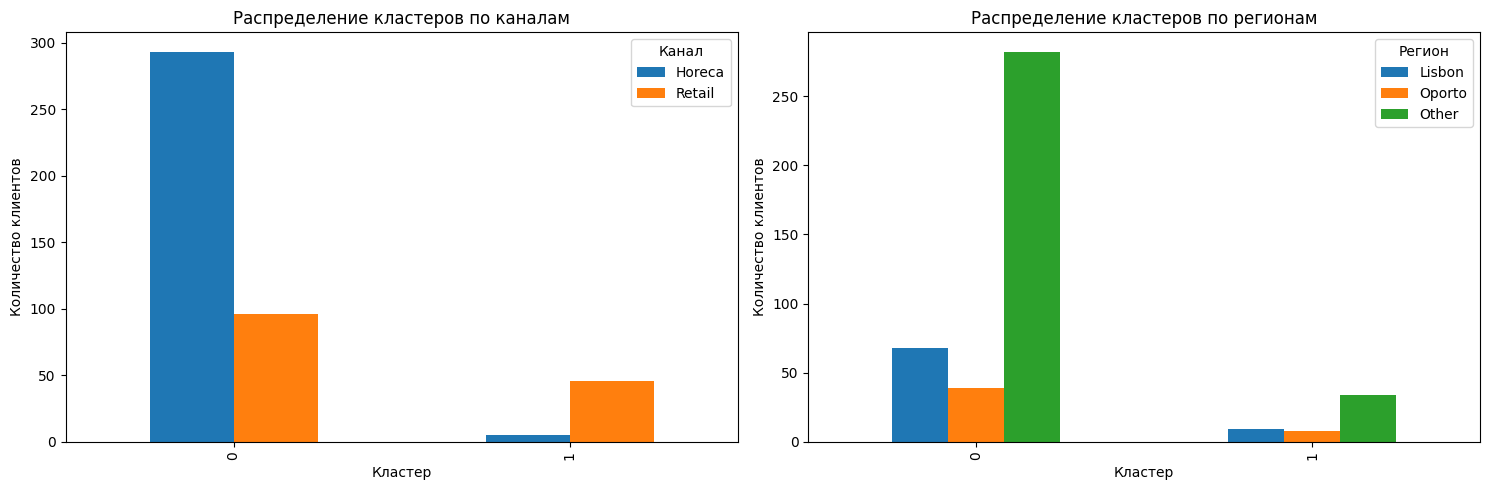

In [32]:
# Анализ кластеров по каналам и регионам
print("Распределение кластеров по каналам:")
cluster_channel = pd.crosstab(df_analysis['Cluster'], df_analysis['Channel_Name'])
print(cluster_channel)

print("\nРаспределение кластеров по регионам:")
cluster_region = pd.crosstab(df_analysis['Cluster'], df_analysis['Region_Name'])
print(cluster_region)

# Визуализация распределения кластеров
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# По каналам
cluster_channel.plot(kind='bar', ax=axes[0])
axes[0].set_title('Распределение кластеров по каналам')
axes[0].set_xlabel('Кластер')
axes[0].set_ylabel('Количество клиентов')
axes[0].legend(title='Канал')

# По регионам
cluster_region.plot(kind='bar', ax=axes[1])
axes[1].set_title('Распределение кластеров по регионам')
axes[1].set_xlabel('Кластер')
axes[1].set_ylabel('Количество клиентов')
axes[1].legend(title='Регион')

plt.tight_layout()
plt.show()

In [33]:
# Подробный анализ каждого кластера
print("=== ДЕТАЛЬНЫЙ АНАЛИЗ КЛАСТЕРОВ ===\n")

for cluster_num in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster_num]
    print(f"КЛАСТЕР {cluster_num}:")
    print(f"Количество клиентов: {len(cluster_data)}")
    print("Средние расходы по категориям:")
    for col in spending_columns:
        mean_val = cluster_data[col].mean()
        print(f"  {col}: {mean_val:,.0f}")
    
    # Основные характеристики
    dominant_categories = cluster_data[spending_columns].mean().nlargest(2)
    print(f"Основные категории: {list(dominant_categories.index)}")
    
    # Анализ по каналам
    channel_dist = cluster_data['Channel'].value_counts()
    channel_names = {1: 'Horeca', 2: 'Retail'}
    print("Распределение по каналам:")
    for channel, count in channel_dist.items():
        print(f"  {channel_names[channel]}: {count} ({count/len(cluster_data)*100:.1f}%)")
    
    print("-" * 50)

=== ДЕТАЛЬНЫЙ АНАЛИЗ КЛАСТЕРОВ ===

КЛАСТЕР 0:
Количество клиентов: 389
Средние расходы по категориям:
  Fresh: 12,157
  Milk: 4,028
  Grocery: 5,403
  Frozen: 3,066
  Detergents_Paper: 1,668
  Delicassen: 1,257
Основные категории: ['Fresh', 'Grocery']
Распределение по каналам:
  Horeca: 293 (75.3%)
  Retail: 96 (24.7%)
--------------------------------------------------
КЛАСТЕР 1:
Количество клиентов: 51
Средние расходы по категориям:
  Fresh: 10,803
  Milk: 19,282
  Grocery: 27,390
  Frozen: 3,117
  Detergents_Paper: 12,140
  Delicassen: 3,569
Основные категории: ['Grocery', 'Milk']
Распределение по каналам:
  Retail: 46 (90.2%)
  Horeca: 5 (9.8%)
--------------------------------------------------
